In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [17]:
#Generate data

ts = []
chance_counter = 0

samples = 10000

for i in range(samples):
    #sampling
    control = np.random.normal(loc= 20, scale = 5, size = 10000)
    treatment = np.random.normal(loc = 20, scale = 5, size = 10000)

    #calculate sample statistics
    treatment_effect = np.mean(treatment) - np.mean(control)
    control_sd = np.std(control, ddof=1)
    treatment_sd = np.std(treatment, ddof=1)

    pooled_sd = np.sqrt(((len(control) - 1)*control_sd**2 + len(treatment)*treatment_sd**2)/(len(control)+len(treatment)-2))
    
    student_se = pooled_sd*np.sqrt((1/len(treatment)) + (1/len(control)))                    
    
    #Calculate test statistic and append to list
    test_statistic = treatment_effect/student_se
    ts.append(test_statistic)
    
    #keep count of spurious rejections of the null
    if abs(test_statistic) > 1.96:
        chance_counter += 1

chance_counter/len(ts)

0.0499

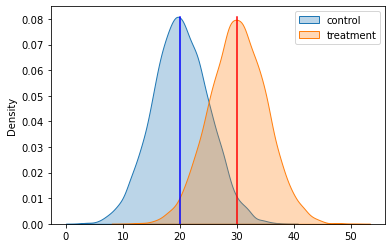

In [46]:
control = np.random.normal(loc= 20, scale = 5, size = 10000)
treatment = np.random.normal(loc = 30, scale = 5, size = 10000)

sns.kdeplot(control, fill = 'red', alpha = 0.3, label = 'control')
sns.kdeplot(treatment, fill = 'blue', alpha = 0.3, label = 'treatment')

plt.axvline(20, 0, 0.95, color = 'blue')
plt.axvline(30, 0, 0.95, color = 'red')
plt.legend()